In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ReLU(preactivation):
    activation = np.where(preactivation>0, preactivation, 0)
    return activation

In [3]:
# 1 input, 3 hidden units, 1 output
def shallow_1_1_3(x, activation_fn, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
    pre_1 = theta_10 + theta_11 * x
    pre_2 = theta_20 + theta_21 * x
    pre_3 = theta_30 + theta_31 * x
    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)
    w_act_1 = phi_1 * act_1
    w_act_2 = phi_2 * act_2
    w_act_3 = phi_3 * act_3
    y = phi_0 + w_act_1 + w_act_2 + w_act_3
    return y

In [7]:
# 신경망 결과를 시각화하는 함수
def plot_neural_two_components(x_in, net1_out, net2_out, net12_out=None):
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0].plot(x_in, net1_out, 'r-')
    ax[0].set_xlabel('Net 1 input'); ax[0].set_ylabel('Net 1 output')
    ax[0].set_xlim([-1, 1]); ax[0].set_ylim([-1, 1])
    ax[0].set_aspect(1.0) #################################################### 뭐지 ? 
    ax[1].plot(x_in, net2_out, 'b-')
    ax[1].set_xlabel('Net 2 input'); ax[1].set_ylabel('Net 2 output')
    ax[1].set_xlim([-1, 1]); ax[1].set_ylim([-1, 1])
    ax[1].set_aspect(1.0)
    plt.show()
    if net12_out is not None:
        fig, ax = plt.subplots()
        ax.plot(x_in, net12_out, 'g-')
        ax.set_xlabel('Net 1 input'); ax.set_ylabel('Net 2 output')
        ax.set_xlim([-1, 1]); ax.set_ylim([-1, 1])
        ax.set_aspect(1.0)
        plt.show()

In [8]:
# Initialization of parameters
n1_theta_10 = 0.0; n1_theta_11 = -1.0
n1_theta_20 = 0; n1_theta_21 = 1.0
n1_theta_30 = -0.67; n1_theta_31 = 1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3
n2_theta_10 = -0.6; n2_theta_11 = -1.0
n2_theta_20 = 0.2; n2_theta_21 = 1.0
n2_theta_30 = -0.5; n2_theta_31 = 1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

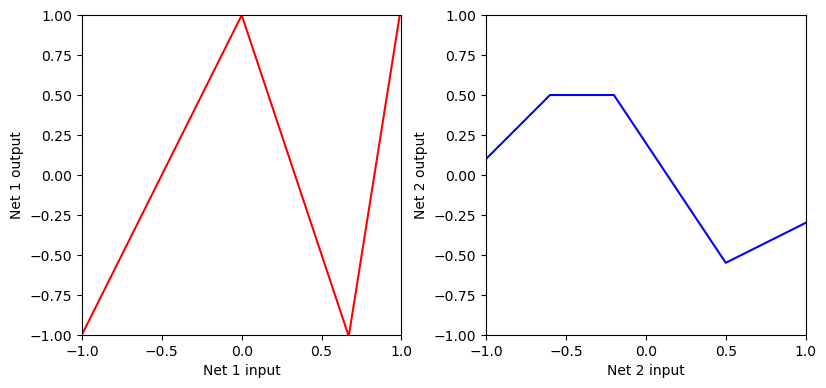

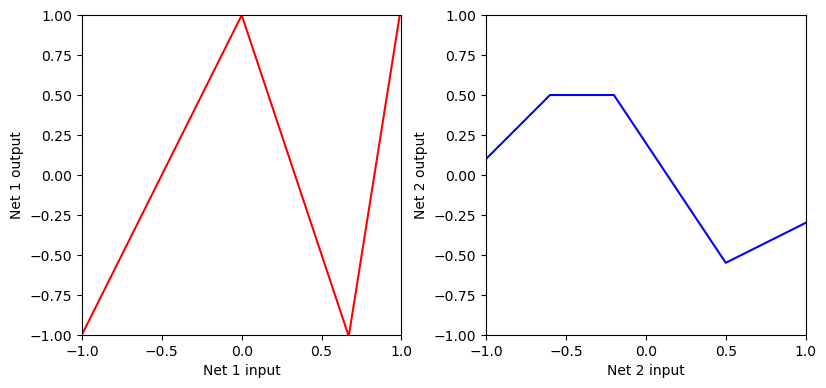

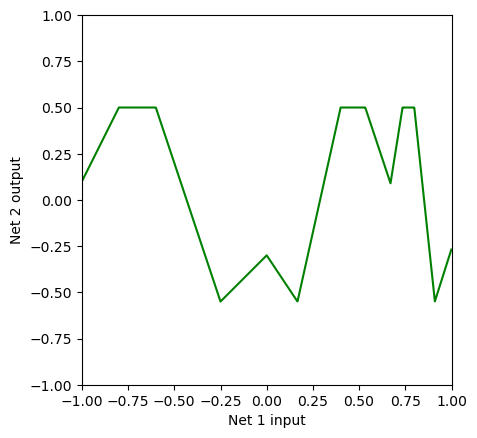

In [9]:
# TODO
# Range of input
x = np.arange(-1, 1, 0.001)
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

# Visualization 
plot_neural_two_components(x, net1_out, net2_out)

# input = output of the 1st layer
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

plot_neural_two_components(x, net1_out, net2_out, net12_out)


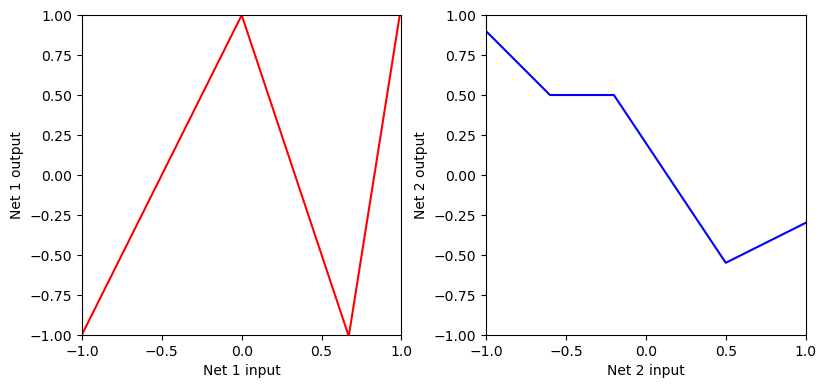

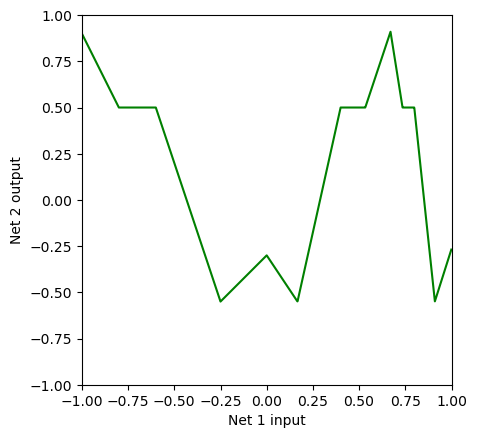

In [18]:
# Now we'll change things a up a bit.  What happens if we change the second network? (note the *-1 change)
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

# input = output of the 1st layer
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

plot_neural_two_components(x, net1_out, net2_out, net12_out)

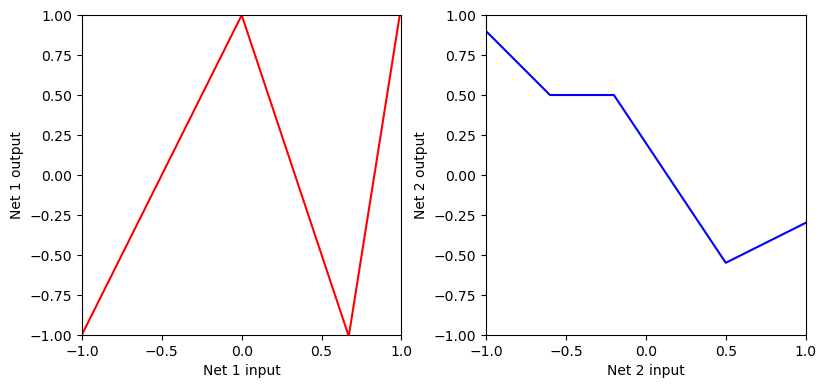

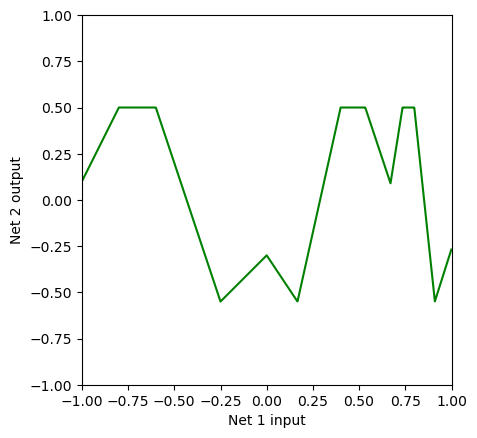

In [11]:
plot_neural_two_components(x, net1_out, net2_out, net12_out)

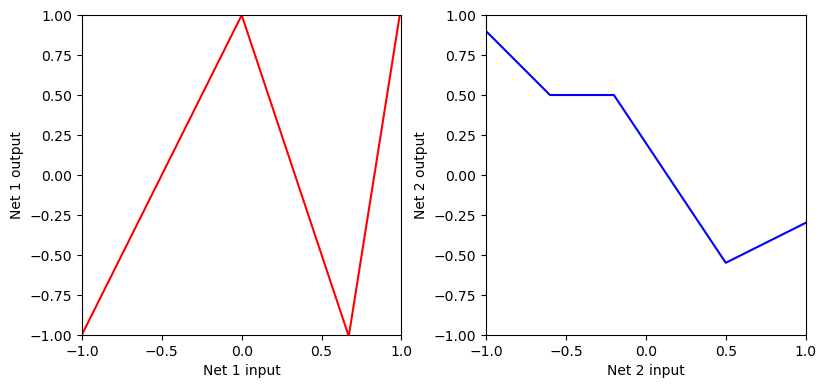

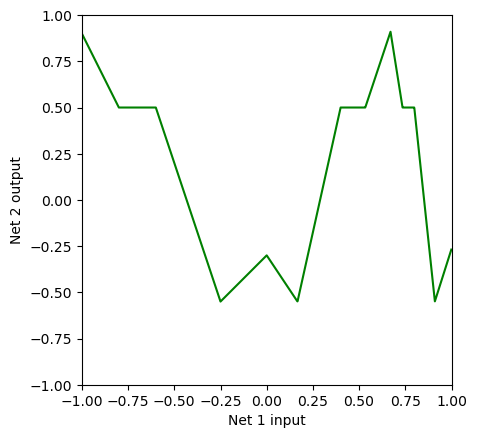

In [12]:
# When you have a prediction, run this code to see if you were right



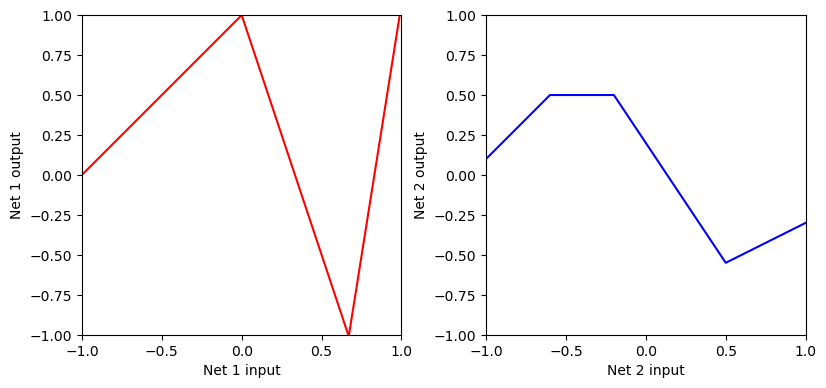

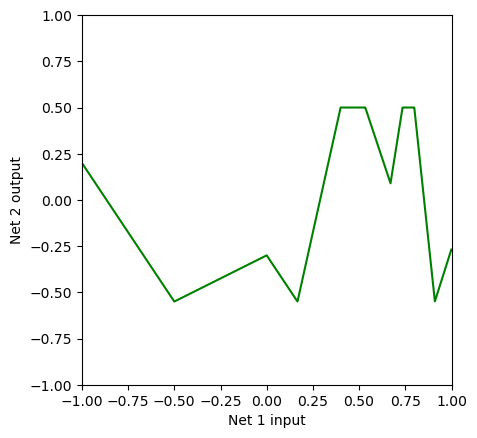

In [19]:
# Let's change things again.  What happens if we change the first network? (note the changes)
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1*0.5, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

plot_neural_two_components(x, net1_out, net2_out, net12_out)
     

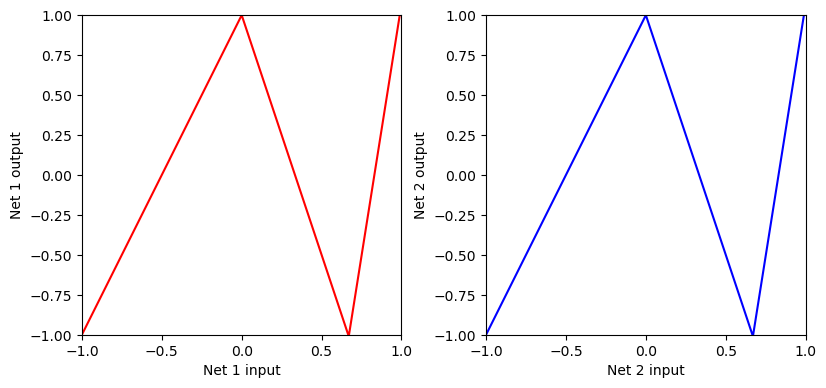

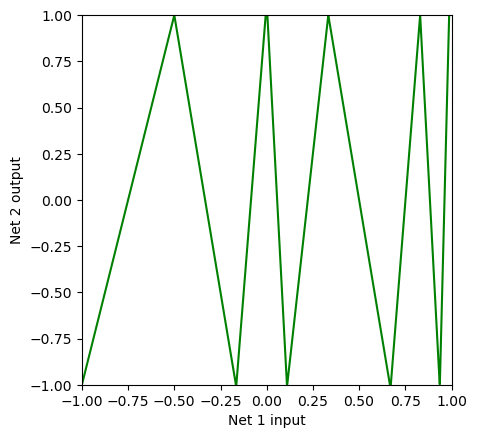

In [22]:
# Let's change things again.  What happens if the first network and second networks are the same?
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out_new = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)

#  When you have a prediction, run this code to see if you were right
net12_out = shallow_1_1_3(net1_out, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
plot_neural_two_components(x, net1_out, net2_out_new, net12_out)
     

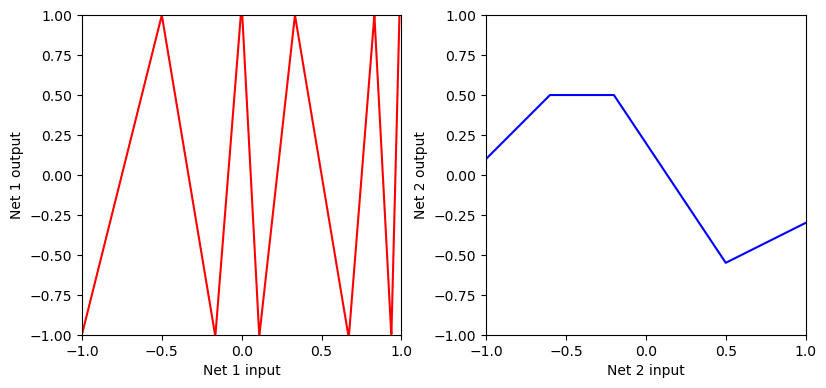

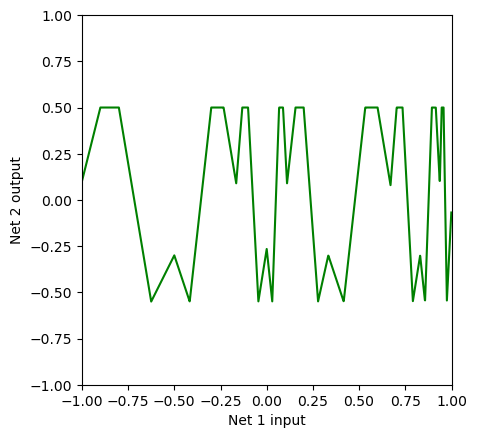

In [23]:
# TODO
# Contemplate what you think will happen when we feed the
# output of the original first network into a second copy of the original first network, and then
# the output of that into the original second network (so now we have a three layer network)
# How many total linear regions will we have in the output?
net123_out = shallow_1_1_3(net12_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net12_out, net2_out, net123_out)

"""Range가 제한되는 모습을 확인할 수 있다."""

In [ ]:
"""
결론 : 적은 수의 파라미터로 매우 많은 Linear Region을 만들 수 있으나, 레이어의 출력이 서로 의존하기에
레이어 개수가 많아진다면
어떤 Boundary가 생성될 지 직관적으로 알아차리기가 너무나도 어려운 것을 알 수 있다.
with very few parameters, we can make A LOT of linear regions, but
they depend on one another in complex ways that quickly become too difficult to understand intuitively."""